In [1]:
#importing Python libraries 
import glob
import pandas as pd
import os

In [2]:
import tensorflow as tf

In [3]:
#importing ML libraries
from tensorflow.keras.layers import Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Reading images with '.png' format
filepath=[]
label =[]

for i in glob.glob('/content/drive/MyDrive/CapstoneProject_COVID/'+'*/*.png'):
  filepath.append(i)
  label.append(i.split('/')[-2])

In [6]:
#Printing file path & importing only last 10 entities 
filepath[:2]

['/content/drive/MyDrive/CapstoneProject_COVID/non-COVID/Non-Covid (1074).png',
 '/content/drive/MyDrive/CapstoneProject_COVID/non-COVID/Non-Covid (1190).png']

In [7]:
#Labeling of dataframe 
df = pd.DataFrame({"Filepath":filepath,"Label":label})
df

,Filepath,Label
0,/content/drive/MyDrive/CapstoneProject_COVID/n...,non-COVID
1,/content/drive/MyDrive/CapstoneProject_COVID/n...,non-COVID
2,/content/drive/MyDrive/CapstoneProject_COVID/n...,non-COVID
3,/content/drive/MyDrive/CapstoneProject_COVID/n...,non-COVID
4,/content/drive/MyDrive/CapstoneProject_COVID/n...,non-COVID
...,...,...
2476,/content/drive/MyDrive/CapstoneProject_COVID/C...,COVID
2477,/content/drive/MyDrive/CapstoneProject_COVID/C...,COVID
2478,/content/drive/MyDrive/CapstoneProject_COVID/C...,COVID
2479,/content/drive/MyDrive/CapstoneProject_COVID/C...,COVID


In [8]:
#checking labels 
df['Label'].value_counts()

COVID        1252
non-COVID    1229
Name: Label, dtype: int64

In [22]:
master_data=df.sample(frac=1)

In [23]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [24]:
#Data Augmentation
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

In [25]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

In [26]:
master_data['Label'].unique()

array(['COVID', 'non-COVID'], dtype=object)

In [27]:
train_images = train_generator.flow_from_dataframe(
    dataframe=master_data,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=4,
    shuffle=True,
    subset='training'
)

Found 1985 validated image filenames.


In [28]:
val_images = train_generator.flow_from_dataframe(
    dataframe=master_data,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=4,
    shuffle=True,
    subset='validation'
)

Found 496 validated image filenames.


In [29]:
# Seting a size variable
IMAGE_SIZE = [224, 224]

In [30]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], 
    weights = 'imagenet', 
    include_top = False    
)

94781440/94765736 [==============================] - 1s 0us/step


In [31]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [32]:
for layer in resnet.layers:
    layer.trainable = True

In [34]:
from glob import glob

In [35]:
file = glob("/content/drive/MyDrive/CapstoneProject_COVID" + '/*')
file

['/content/drive/MyDrive/CapstoneProject_COVID/non-COVID',
 '/content/drive/MyDrive/CapstoneProject_COVID/COVID']

In [36]:
capstone_project_label = ['COVID', 'non-COVID']
x = Flatten()(resnet.output)

In [37]:
prediction= Dense(len(file), activation = 'softmax')(x)

In [39]:
resnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [40]:
#Creating a model object
model= Model(inputs= resnet.input, outputs= prediction)

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [42]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [43]:
  
train_datagen=ImageDataGenerator(rescale=1./255, 
    validation_split=0.25,
    horizontal_flip = True,    
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3
    )

train_generator=train_datagen.flow_from_dataframe(
    dataframe=master_data,
    directory="/content/drive/MyDrive/CapstoneProject_COVID",
    x_col='Filepath',
    y_col='Label', 
    batch_size=4,
    shuffle=True,
    class_mode="categorical",    
    target_size=(224,224)
)

Found 2481 validated image filenames belonging to 2 classes.


In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
    dataframe=master_data,
    directory="/content/drive/MyDrive/CapstoneProject_COVID",
    x_col="Filepath",
    y_col="Label",
    batch_size=4,
    shuffle=True,
    class_mode="categorical",    
    target_size=(224,224)
)

Found 2481 validated image filenames belonging to 2 classes.


In [46]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [47]:
ckpt_path = 'new_model.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(ckpt_path,save_best_only=True)

In [48]:
EarlyStopping = tf.keras.callbacks.EarlyStopping(patience=4)

In [49]:
history = model.fit_generator(
    train_generator,
    validation_data = test_generator,
    epochs = 10,
    steps_per_epoch = len(train_generator),
    validation_steps = len(test_generator)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
621/621 [==============================] - 545s 851ms/step - loss: 3.7108 - accuracy: 0.5550 - val_loss: 0.6941 - val_accuracy: 0.5046
Epoch 2/10
621/621 [==============================] - 67s 108ms/step - loss: 1.7926 - accuracy: 0.5377 - val_loss: 0.6898 - val_accuracy: 0.5796
Epoch 3/10
621/621 [==============================] - 67s 109ms/step - loss: 0.8671 - accuracy: 0.5832 - val_loss: 1.4901 - val_accuracy: 0.5010
Epoch 4/10
621/621 [==============================] - 67s 108ms/step - loss: 0.6157 - accuracy: 0.6852 - val_loss: 0.5144 - val_accuracy: 0.7686
Epoch 5/10
621/621 [==============================] - 69s 111ms/step - loss: 0.5139 - accuracy: 0.7731 - val_loss: 4.0560 - val_accuracy: 0.5062
Epoch 6/10
621/621 [==============================] - 69s 111ms/step - loss: 0.6039 - accuracy: 0.7255 - val_loss: 2.1446 - val_accuracy: 0.5288
Epoch 7/10
621/621 [==============================] - 69s 111ms/step - loss: 0.5670 - accuracy: 0.7485 - val_loss: 0.4092 - val_a

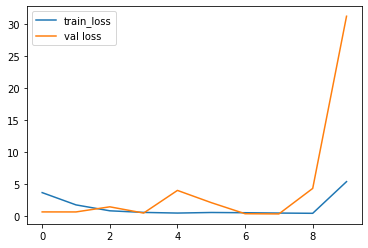

In [50]:
#Plot the loss
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

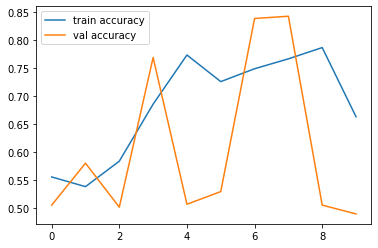

In [51]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

In [52]:
#Predication on Test Data
prediction = model.predict(test_generator)

In [53]:
prediction

array([[3.1398081e-29, 1.0000000e+00],
       [2.6034320e-27, 1.0000000e+00],
       [6.1406214e-23, 1.0000000e+00],
       ...,
       [7.4585365e-34, 1.0000000e+00],
       [1.1614343e-20, 1.0000000e+00],
       [7.2289979e-29, 1.0000000e+00]], dtype=float32)

In [54]:
np.argmax(prediction, axis = 1)

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
prediction = np.argmax(prediction)
prediction

0